In [1]:
path = "c:\\pytest\\"

In [2]:
import pandas as pd

data = pd.read_csv(path+"income.csv")
print(data.columns.values)
print(data.head())

['age' 'workclass' 'education' 'educationNumber' 'maritalStatus'
 'occupation' 'relationship' 'race' 'gender' 'hourPerWeek' 'nativeCountry'
 'income']
   age          workclass   education  educationNumber        maritalStatus  \
0   39          State-gov   Bachelors               13        Never-married   
1   50   Self-emp-not-inc   Bachelors               13   Married-civ-spouse   
2   38            Private     HS-grad                9             Divorced   
3   53            Private        11th                7   Married-civ-spouse   
4   28            Private   Bachelors               13   Married-civ-spouse   

           occupation    relationship  race   gender  hourPerWeek  \
0        Adm-clerical   Not-in-family     4     Male           40   
1     Exec-managerial         Husband     4     Male           13   
2   Handlers-cleaners   Not-in-family     4     Male           40   
3   Handlers-cleaners         Husband     3     Male           40   
4      Prof-specialty        

In [3]:
X = data.loc[:,'age':'nativeCountry']
X.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,Male,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,Male,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,Male,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,Female,40,Cuba


In [37]:
data.columns

Index(['age', 'workclass', 'education', 'educationNumber', 'maritalStatus',
       'occupation', 'relationship', 'race', 'gender', 'hourPerWeek',
       'nativeCountry', 'income'],
      dtype='object')

In [4]:
y = data.loc[:,'income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education        32561 non-null  object
 3   educationNumber  32561 non-null  int64 
 4   maritalStatus    32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  int64 
 8   gender           32561 non-null  object
 9   hourPerWeek      32561 non-null  int64 
 10  nativeCountry    32561 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [8]:
X_num = X.select_dtypes(exclude='object')
X_cat = X.select_dtypes(include='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
print(X_scaled)
print(type(X_scaled))

[[0.30136986 0.8        0.75       0.39795918]
 [0.45205479 0.8        0.75       0.12244898]
 [0.28767123 0.53333333 0.75       0.39795918]
 ...
 [0.56164384 0.53333333 0.75       0.39795918]
 [0.06849315 0.53333333 0.75       0.19387755]
 [0.47945205 0.53333333 0.75       0.39795918]]
<class 'numpy.ndarray'>


In [11]:
X_hot = pd.get_dummies(X_cat)
print(X_hot.columns.values)
print(type(X_hot))
X_hot.head()

['workclass_ ?' 'workclass_ Federal-gov' 'workclass_ Local-gov'
 'workclass_ Never-worked' 'workclass_ Private' 'workclass_ Self-emp-inc'
 'workclass_ Self-emp-not-inc' 'workclass_ State-gov'
 'workclass_ Without-pay' 'education_ 10th' 'education_ 11th'
 'education_ 12th' 'education_ 1st-4th' 'education_ 5th-6th'
 'education_ 7th-8th' 'education_ 9th' 'education_ Assoc-acdm'
 'education_ Assoc-voc' 'education_ Bachelors' 'education_ Doctorate'
 'education_ HS-grad' 'education_ Masters' 'education_ Preschool'
 'education_ Prof-school' 'education_ Some-college'
 'maritalStatus_ Divorced' 'maritalStatus_ Married-AF-spouse'
 'maritalStatus_ Married-civ-spouse'
 'maritalStatus_ Married-spouse-absent' 'maritalStatus_ Never-married'
 'maritalStatus_ Separated' 'maritalStatus_ Widowed' 'occupation_ ?'
 'occupation_ Adm-clerical' 'occupation_ Armed-Forces'
 'occupation_ Craft-repair' 'occupation_ Exec-managerial'
 'occupation_ Farming-fishing' 'occupation_ Handlers-cleaners'
 'occupation_ Machi

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(
    drop=True), X_hot.reset_index(drop=True)], axis=1)
X_final.head()


,0,1,2,3,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0.301370,0.800000,0.75,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.75,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.75,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.50,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.50,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print('X.shape:', X_final.shape)
print('y.shape:', y.shape)


X.shape: (32561, 101)
y.shape: (32561,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y)


In [16]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(101,)))
model.add(Dense(32, 'relu'))
model.add(Dense(1, 'sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6528      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20,
                    batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
764/764 [==============================] - 5s 4ms/step - loss: 0.3724 - acc: 0.8249 - val_loss: 0.3677 - val_acc: 0.8209
Epoch 2/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3528 - acc: 0.8348 - val_loss: 0.3547 - val_acc: 0.8356
Epoch 3/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3493 - acc: 0.8367 - val_loss: 0.3667 - val_acc: 0.8337
Epoch 4/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3472 - acc: 0.8393 - val_loss: 0.3546 - val_acc: 0.8363
Epoch 5/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3464 - acc: 0.8385 - val_loss: 0.3542 - val_acc: 0.8370
Epoch 6/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3450 - acc: 0.8410 - val_loss: 0.3542 - val_acc: 0.8350
Epoch 7/20
764/764 [==============================] - 3s 4ms/step - loss: 0.3440 - acc: 0.8415 - val_loss: 0.3546 - val_acc: 0.8368
Epoch 8/20
764/764 [==============================] - 3s 4ms/step - loss: 0.

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracyofeachepoch:', acc)
epochs = range(1, len(acc)+1)


Accuracyofeachepoch: [0.8249385952949524, 0.8347665667533875, 0.8366503119468689, 0.839271068572998, 0.8384521007537842, 0.8409910202026367, 0.841482400894165, 0.8416461944580078, 0.8434889316558838, 0.8440622687339783, 0.8440213203430176, 0.8462735414505005, 0.8461916446685791, 0.8475430011749268, 0.8471335172653198, 0.8475020527839661, 0.8467649221420288, 0.847911536693573, 0.8478296399116516, 0.8499590754508972]


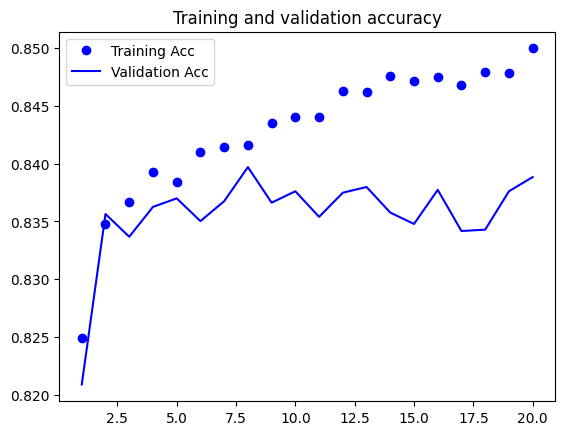

In [19]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

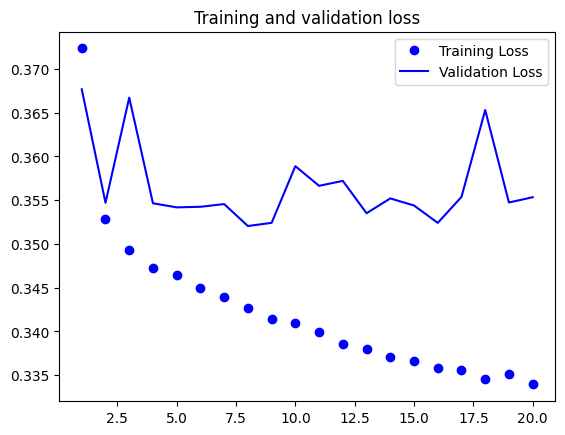

In [20]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [85]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv(path + "income.csv")
data_X = data.loc[:, 'age':'nativeCountry']
print('data_X.shape:', data_X.shape)

newdata = pd.read_csv(path + "income_test.csv")
newdata_X = newdata.loc[:, 'age':'nativeCountry']
print('newdata_X.shape:', newdata_X.shape)

data_appended = newdata_X.append(data_X)
print('data_appended.shape:', data_appended.shape)


data_X.shape: (32561, 11)
newdata_X.shape: (10, 11)
data_appended.shape: (32571, 11)


In [86]:
X_num = data_appended.select_dtypes(exclude='object')
X_cat = data_appended.select_dtypes(include='object')
# scaler = MinMaxScaler() #train에서 만든 scaler를 써야한다.
# scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_hot = pd.get_dummies(X_cat)
X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(drop=True), X_hot.reset_index(drop=True)], axis=1)
print(X_final.shape)
X_only_new = X_final.iloc[0:10, :]
print(X_only_new.shape)


(32571, 101)
(10, 101)


In [31]:
X_final

,0,1,2,3,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0.273973,0.600000,0.75,0.387755,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.068493,0.466667,0.50,0.346939,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.232877,0.800000,0.75,0.551020,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.178082,0.533333,0.50,0.459184,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.287671,0.800000,0.50,0.448980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32566,0.136986,0.733333,0.75,0.377551,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32567,0.315068,0.533333,0.75,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32568,0.561644,0.533333,0.75,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32569,0.068493,0.533333,0.75,0.193878,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
predictions = model.predict(X_only_new)
print("Result:", predictions)


1/1 [==============================] - 0s 103ms/step
Result: [[2.0031219e-02]
 [1.4151576e-04]
 [3.3938327e-01]
 [4.7225602e-02]
 [1.1621514e-01]
 [1.7544387e-05]
 [2.5315105e-04]
 [3.9901879e-02]
 [2.7297253e-02]
 [1.0931413e-01]]


In [36]:
result = []
for i, prediction in enumerate(predictions):
    if prediction > 0.1:
        result.append(str(i)+" above 50K")
    else:
        result.append(str(i)+" below 50K")
result

['0 below 50K',
 '1 below 50K',
 '2 above 50K',
 '3 below 50K',
 '4 above 50K',
 '5 below 50K',
 '6 below 50K',
 '7 below 50K',
 '8 below 50K',
 '9 above 50K']

In [39]:
model.save("c:\\projects\\model\\221012\\income_model.h5")

In [94]:
import pickle
with open("c:\\projects\\model\\221012\\income_scaler.pickle", 'wb') as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)


with open("c:\\projects\\model\\221012\\income_onehot.pickle", 'wb') as f:
    pickle.dump(list(X_hot.columns), f, protocol=pickle.HIGHEST_PROTOCOL)

In [165]:
# 연습문제
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

loaded_model = load_model("c:\\projects\\model\\221012\\income_model.h5")
with open("c:\\projects\\model\\221012\\income_scaler.pickle", 'rb') as handle:
    loaded_scaler = pickle.load(handle)
with open("c:\\projects\\model\\221012\\income_onehot.pickle", 'rb') as handle:
    loaded_columns = pickle.load(handle)

user_input = []
user_question = {0: 'age', 1: 'workclass', 2: 'education', 3: 'educationNumber', 4: 'maritalStatus', 5: 'occupation', 6: 'relationship', 7: 'race', 8: 'gender', 9: 'hourPerWeek', 10: 'nativeCountry'}
for i in range(11):
    user_input.append(input(f"{user_question[i]}를 입력하세요."))
#  ["50", "Self-emp-not-inc", "Bachelors", "13", "Married-civ-spouse",
#   "Exec-managerial", "Husband", "4", "Male", "13", "United-States"]

test_df = pd.DataFrame(user_input).T
test_df = test_df.rename(columns={0: 'age', 1: 'workclass', 2: 'education', 3: 'educationNumber', 4: 'maritalStatus', 5: 'occupation', 6: 'relationship', 7: 'race', 8: 'gender', 9: 'hourPerWeek', 10: 'nativeCountry'})
test_df.iloc[:,0] = test_df.iloc[:,0].apply(pd.to_numeric)
test_df.iloc[:,3] = test_df.iloc[:,3].apply(pd.to_numeric)
test_df.iloc[:,7] = test_df.iloc[:,7].apply(pd.to_numeric)
test_df.iloc[:,9] = test_df.iloc[:,9].apply(pd.to_numeric)

X_num = test_df.select_dtypes(exclude='object')
X_cat = test_df.select_dtypes(include='object')

X_scaled = loaded_scaler.transform(X_num)
X_hot = pd.get_dummies(X_cat)

for i in list(X_hot.columns):
    j = i
    tmp = i.replace('_', '_ ')
    X_hot = X_hot.rename(columns={j: tmp})

for columns in loaded_columns:
    if columns not in list(X_hot.columns):
        X_hot[columns] = 0

X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(drop=True), X_hot.reset_index(drop=True)], axis=1)

predictions = loaded_model.predict(X_final)

if predictions >= 0.5:
    print(f"{float(predictions)*100:.2f}% 확률로, above 50K")
else:
    print(f"{float(predictions)*100:.2f}% 확률로, below 50K")


In [254]:
import math

a, b = map(int, input().split())
p = 1000000009

import sys
sys.setrecursionlimit(10**6)

# def mod(b, n, m):
#     x = 1
#     n = list(bin(n)[2:])
#     n.reverse()
#     pow = b % m

#     for i in range(0, len(n)):
#         if n[i] == '1':
#             x = (x * pow) % m
#         pow = (pow * pow) % m
#     return x

def mini(b, n, m):
    if n%2==0:
        result = mini(b, n//2, m)**2 % m
    elif n==1:
        result = b % m
    else:
        result = (mini(b, n//2, m)**2 * (b % m))% m
    return result

sum = 0
for i in range(1, a+1):
    sum += mini(i, b, p)
print(sum % p)


30


In [245]:
mod(3,4,p)

['0', '0', '1']
0
1
2
2 1


(243, 81)

In [216]:
bin(5)[2:]

'101'